In [7]:
import pandas as pd
df=pd.DataFrame({
    'age':[25,30,35,40,45],
    'salary':[5000,6000,7000,8000,9000],
    'country_code':[1,1,1,1,1]
})
df

,age,salary,country_code
0,25,5000,1
1,30,6000,1
2,35,7000,1
3,40,8000,1
4,45,9000,1


In [9]:
from sklearn.feature_selection import VarianceThreshold

selector=VarianceThreshold(threshold=0.1)
selector.fit_transform(df)

selected_features=df.columns[selector.get_support()]
print("Selected Features: ",selected_features)

Selected Features:  Index(['age', 'salary'], dtype='object')


Scenario: Hospital Disease Prediction System
You are building a machine learning model to predict whether a patient has a particular disease.

The dataset contains the following features:

Age
Blood Pressure
Cholesterol Level
Gender
Country Code
Hospital ID

Machine Version Used for Testing
After initial exploration, you notice:
Country Code is 100% “India” for all records
Machine Version is 99% “v2.1” and only 1% “v2.2”
Hospital ID is same for all patients

❓ Question:
Which feature selection technique would you apply first?
Which features would likely be removed?
Why is removing these features important before training?
What problem might occur if you keep them? 

 

1. The first technique to apply here is:

👉 Low-variance feature filtering (Variance Threshold / Constant Feature Removal)

This is usually one of the earliest preprocessing steps because:

Features with little or no variability contain almost no useful information for prediction.

They cannot help distinguish between different outcomes.

Typical methods include:

Variance Threshold

Removing constant or near-constant columns

Exploratory Data Analysis (EDA) with feature distributions


2. Based on your observations:

🚫 Country Code

100% = “India”

Completely constant.

No variability → zero predictive signal.

👉 Remove.

🚫 Hospital ID

Same for all patients.

Also constant.

👉 Remove.

⚠️ Machine Version Used for Testing

99% = v2.1

1% = v2.2

This is a near-constant feature.

Possible actions:

Likely remove if:

It does not meaningfully correlate with disease outcome.

The rare category is too small to learn from.

But:

Keep temporarily if you suspect:

Measurement bias

Different machines affect test accuracy.

👉 Usually removed early unless domain knowledge says otherwise.

✅ Likely remaining useful features

Age

Blood Pressure

Cholesterol Level

Gender

These have real variability and biological relevance.

✅ 3. Why is removing these features important before training?
🔹 A. No predictive information

Constant features:

Cannot split decision boundaries.

Provide zero entropy reduction in tree models.

Have zero coefficients in linear models.

They add noise without benefit.

🔹 B. Reduce dimensionality

Benefits include:

Faster training.

Less memory usage.

Simpler models.

🔹 C. Prevent misleading patterns

Near-constant features may:

Introduce statistical instability.

Lead models to overfit rare values.

🔹 D. Improve model interpretability

Cleaner feature space:

Easier to explain.

Easier feature importance analysis.

✅ 4. What problem might occur if you keep them?

Several issues:

❌ Overfitting to rare values

Example:

Model might learn: “v2.2 → disease present” simply because of small sample artifacts.

This creates:

Spurious correlations.

Poor generalization.
❌ Training instability

Especially for:

Linear models

Neural networks

Low variance can cause:

Numerical issues

Poor scaling.

❌ Data leakage risk (important!)

If constant identifiers like Hospital ID were unique in another dataset:

Model could memorize source instead of learning medical patterns.

❌ Increased noise & slower training

Unnecessary features increase complexity without adding signal.

*** Correlation Coefficient ***

In [10]:
import pandas as pd
import numpy as np

df=pd.DataFrame({
    'size_sqft':[1000,1500,2000,2500,3000],
    'titles_count':[100,150,200,250,300],
    'price':[200000,300000,400000,500000,600000]
})

In [11]:
correlation_matrix=df.corr()
print(correlation_matrix)

              size_sqft  titles_count  price
size_sqft           1.0           1.0    1.0
titles_count        1.0           1.0    1.0
price               1.0           1.0    1.0


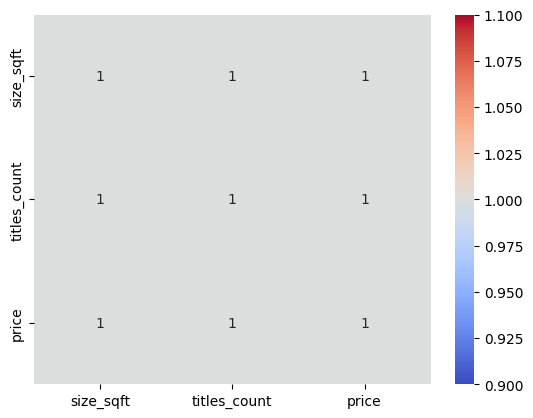

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm')
plt.show()

In [15]:
#Removing highly correlated features(>0.9)
upper=correlation_matrix.where(
    np.triu(np.ones(correlation_matrix.shape),k=1).astype(bool)
    )

to_drop=[column for column in upper.columns if any(upper[column]>0.9)]
print("Highly Correlated Featured to Drop: ",to_drop)


Highly Correlated Featured to Drop:  ['titles_count', 'price']


🏠 Scenario: Real Estate Price Prediction
You are developing a regression model to predict 

house prices.
Dataset contains:
House Size (sqft)
Number of Tiles
Total Construction Cost
Number of Bedrooms
Market Price

After calculating correlation matrix, you find:
House Size and Number of Tiles have 0.98 correlation
Construction Cost is highly correlated (0.95) with House Size

❓ Question:
Why is high correlation between features a problem?
Which feature(s) would you remove and why?
What issue can occur if highly correlated features are kept?
Which filter method is appropriate here?
 

In [16]:
import pandas as pd

df1= pd.DataFrame({
    "House_Size_sqft": [1000, 1200, 1500, 1800, 2000, 2200],
    "Number_of_Tiles": [500, 600, 750, 900, 1000, 1100],   # highly correlated with size
    "Construction_Cost": [50, 60, 75, 90, 100, 110],       # also correlated with size
    "Number_of_Bedrooms": [2, 3, 3, 4, 4, 5],
    "Market_Price": [200, 240, 300, 360, 400, 440]
})

print(df1)




   House_Size_sqft  Number_of_Tiles  Construction_Cost  Number_of_Bedrooms  \
0             1000              500                 50                   2   
1             1200              600                 60                   3   
2             1500              750                 75                   3   
3             1800              900                 90                   4   
4             2000             1000                100                   4   
5             2200             1100                110                   5   

   Market_Price  
0           200  
1           240  
2           300  
3           360  
4           400  
5           440  


In [21]:
correlation_matrix1 = df1.corr()
print(correlation_matrix1)


                    House_Size_sqft  Number_of_Tiles  Construction_Cost  \
House_Size_sqft            1.000000         1.000000           1.000000   
Number_of_Tiles            1.000000         1.000000           1.000000   
Construction_Cost          1.000000         1.000000           1.000000   
Number_of_Bedrooms         0.960518         0.960518           0.960518   
Market_Price               1.000000         1.000000           1.000000   

                    Number_of_Bedrooms  Market_Price  
House_Size_sqft               0.960518      1.000000  
Number_of_Tiles               0.960518      1.000000  
Construction_Cost             0.960518      1.000000  
Number_of_Bedrooms            1.000000      0.960518  
Market_Price                  0.960518      1.000000  


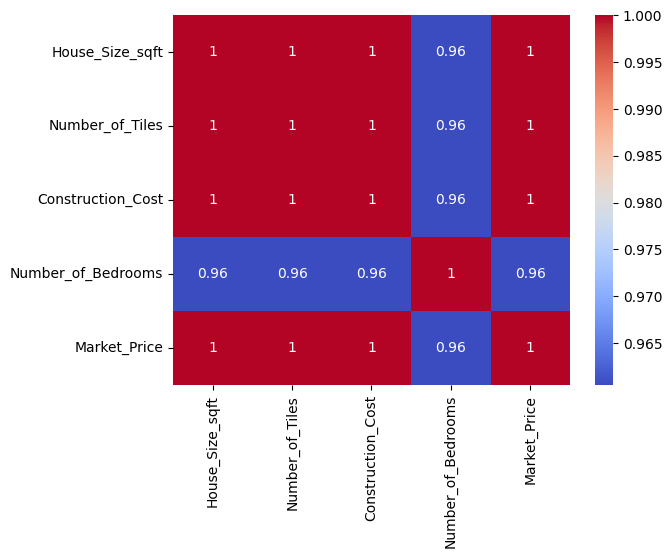

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(correlation_matrix1,annot=True,cmap='coolwarm')
plt.show()

In [23]:
#Removing highly correlated features(>0.9)
upper=correlation_matrix1.where(
    np.triu(np.ones(correlation_matrix1.shape),k=1).astype(bool)
    )

to_drop=[column for column in upper.columns if any(upper[column]>0.9)]
print("Highly Correlated Featured to Drop: ",to_drop)

Highly Correlated Featured to Drop:  ['Number_of_Tiles', 'Construction_Cost', 'Number_of_Bedrooms', 'Market_Price']


1. Why is high correlation between features a problem?

High correlation between features means they contain almost the same information. This leads to:

👉 Multicollinearity

Problems caused:

Redundant information (duplicate signals)

Model cannot distinguish which feature is important

Unstable regression coefficients

Increased variance in predictions

Harder interpretation of model results

Example:

If House Size and Number of Tiles move together almost perfectly (0.98), the model receives repeated information.

✅ 2. Which feature(s) would you remove and why?

Given:

House Size ↔ Number of Tiles = 0.98

House Size ↔ Construction Cost = 0.95

Recommended approach:

👉 Keep the most fundamental and meaningful feature.

Likely decision:

✅ Keep:

House Size (primary physical feature)

Number of Bedrooms (different information)

🚫 Remove:

Number of Tiles (derived from size)

Possibly Construction Cost (if redundant with size)

Reason:

Tiles and construction cost are strongly dependent on house size.

They add redundancy without new information.

✅ 3. What issue can occur if highly correlated features are kept?

Main issues:

❌ Multicollinearity

Coefficients become unstable.

Small data changes → large coefficient changes.

❌ Misleading feature importance

Model may assign wrong importance.

❌ Overfitting risk

Model learns redundant patterns.

❌ Reduced interpretability

Hard to explain which feature actually drives predictions.

✅ 4. Which filter method is appropriate here?

👉 Correlation-based feature selection

Common approach:

Compute Pearson correlation matrix.

Set threshold (example: 0.9).

Remove one feature from highly correlated pairs.

*** Chi-square Filtering method ***

In [26]:
import pandas as pd
x=pd.DataFrame({
    'Gender':[0,1,0,1,1], #1:male 0:female
    'Married':[1,1,0,0,1], #1:Married
    'Income':[20000,40000,50000,30000,60000]

})
y=[0,1,1,0,1]
df

,Gender,Married,Income
0,0,1,20000
1,1,1,40000
2,0,0,50000
3,1,0,30000
4,1,1,60000


In [30]:
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest
from sklearn.preprocessing import MinMaxScaler

scalar=MinMaxScaler()
x_scaled=scalar.fit_transform(x)

selector=SelectKBest(score_func=chi2,k=2)
x_new=selector.fit_transform(x_scaled,y)

selected_features=x.columns[selector.get_support()]

print("Selected Features: ",selected_features)


Selected Features:  Index(['Married', 'Income'], dtype='object')


Scenario: Loan Approval Classification
You are building a classification model to predict whether a loan will be approved.

Dataset features:
Gender (Male/Female)
Marital Status (Yes/No)
Education Level (Graduate/Non-Graduate)
Applicant Income
Property Area (Urban/Rural)
Favorite Color
Loan Status (Approved/Rejected)

You want to identify which categorical features significantly influence loan approval.

❓ Question:
Which filter method is most appropriate here?
Which type of features can be tested using this method?
If “Favorite Color” has a very low chi-square score, what does it indicate?
Why is chi-square suitable only for classification problems?
 

In [32]:
import pandas as pd

# Example loan dataset
df = pd.DataFrame({
    "Gender": ["Male", "Female", "Male", "Female", "Male"],
    "Marital_Status": ["Yes", "No", "Yes", "Yes", "No"],
    "Education_Level": ["Graduate", "Non-Graduate", "Graduate", "Graduate", "Non-Graduate"],
    "Applicant_Income": [5000, 3000, 4000, 6000, 3500],
    "Property_Area": ["Urban", "Rural", "Urban", "Urban", "Rural"],
    "Favorite_Color": ["Red", "Blue", "Green", "Blue", "Red"],
    "Loan_Status": ["Approved", "Rejected", "Approved", "Approved", "Rejected"]
})



In [33]:

from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest
from sklearn.preprocessing import MinMaxScaler, LabelEncoder



# Step 2 — Encode categorical features
le = LabelEncoder()

for col in df.columns:
    df[col] = le.fit_transform(df[col])

# Step 3 — Split features and target
x = df.drop("Loan_Status", axis=1)
y = df["Loan_Status"]

# Step 4 — Scale features (chi2 requires non-negative values)
scalar = MinMaxScaler()
x_scaled = scalar.fit_transform(x)

# Step 5 — Apply SelectKBest with chi2
selector = SelectKBest(score_func=chi2, k=2)
x_new = selector.fit_transform(x_scaled, y)

# Step 6 — Get selected feature names
selected_features = x.columns[selector.get_support()]

print("Selected Features:", selected_features)


Selected Features: Index(['Education_Level', 'Property_Area'], dtype='object')
